In [3]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Final Presentation

## Introduction
For our project, we define "bestness" as safety. Thus, the safest neighborhood will be considered the best, while the most dangerous neighborhood to live in would be considered the worst. 


## Metric
There will exist $3$ submetrics within this project. Each submetric will produce a "ranking" of neighborhoods, as stored as a Series. Afterwards, the neighborhood with the lowest average ranking (ranking is based on index in the Series) across all $3$ Series would be determined to be the best.



### Submetric 1: Police Incidents
Police Incidents will be the first sub-metric. We shall be using this dataset: https://data.wprdc.org/dataset/police-incident-blotter.
Each neighborhood will be assigned a "Bad Value," as determined by the following arbitrary equation: 

$N = z + \sum_{i_0}^{i_k}v_i$

Where $i$ is the $i$th incident of the neighborhood within the dataset, with $i_0$ being the first in the dataset and $i_k$ being the last,
where $v_i$ is the "bad" value of the $i$th incident(as determined by another ranking, based on the INCIDENTHIERARCHYDESC column, an **opinionated ranking**),
and where $z$ is the amount of incidents in that neighborhood.

Each neighborhood will be ranked, with the neighborhood with the lowest $N$ value being the best, while the neighborhood with the highest $N$ value being the worst.


We will first determine the $z$ values for each neighborhood.

In [4]:
police_incidents = pd.read_csv("incidentBlotter.csv")
z_vals = police_incidents['INCIDENTNEIGHBORHOOD'].value_counts()

Visualization of the total police incidents per neighborhood:

<Axes: ylabel='INCIDENTNEIGHBORHOOD'>

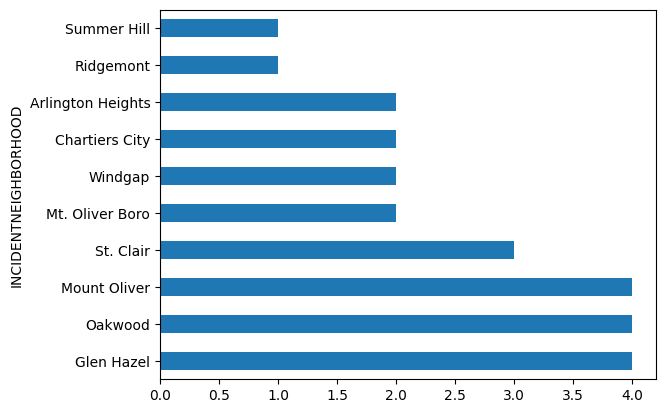

In [7]:
z_vals.tail(10).plot.barh()

As we can see, **Summer Hill** and **Ridgemont** has the least incidents.

Now, we determine the $v_i$ values. This will be an **opinionated** ranking on the severity of the incidents.

In [8]:
i_v_vals = pd.Series(police_incidents['INCIDENTHIERARCHYDESC'].unique())
intList = []
for i in range(86):
    intList.append(i+1)

v_i_sorted = pd.Series(intList,index = ['99','DOG BITE','RUNAWAYS - JUVENILE','MISCELLANEOUS INVESTIGATION','FOUND PROPERTY','LOST PROPERTY','INJURY/TAMP/FIRE APP-HYD-ETC',
                        'FALSE RPT LAW ENFORCE AUTH',
                        'PROSTITUTION INVESTIGATION', 'SOLICITING ANOTHER TO PATRONIZE A PROSTITUTE','DISORDERLY CONDUCT', 'OPEN LEWDNESS', 'PUBLIC DRUNKENESS',
                        'FALSE ALARMS AGENCIES PUB SAF',  'FAILURE TO PREVENT CATASTROPHE', 'NEGLECT OF CARE-DEPENDENT PERSON',
                        'AGRICULTURAL VANDALISM', 'CREDIT CARDS', 'FORGERY', 
                        'BENCH WARRANT ARREST - NO TIE', 'NON-VIOLENT DOMESTIC', 'LOITERING PROWLING AT NIGHT', 'INDECENT EXPOSURE',
                        'RETALIATION FOR PAST OFF ACTION', 'UNAUTHORIZED USE VEHICLE', 'INTERFER/CUSTODY OF CHILDREN', 
                        'MENTAL 201/302', 'RESIST ARREST/OTHER LAW ENFORC', 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED', 'MISCELLANEOUS FIRE VEH INVEST CONTINUED',
                        'CRIMINAL TRESPASS', 'TAMPER WITH/FAB PHYS EVIDENCE', 
                        'FOUND DRUGS', 'THEFT OF SERVICES', 'ARREST ON ATTACHMENT ORDER',
                        'HARRASSMENT','HARRASSMENT/THREAT/ATTEMPT/PHY',  'PUR/CON/POS/TRAN-INTOX BEVERAG', 
                        'IDENTITY THEFT','SIMPLE ASSAULT','AIDED CASE', 'DRUG INVESTIGATION', 'CRIM MISCHIEF (GRAFFITI)',  'INDECENT ASSAULT', 'INDECENT ASSAULT WITHOUT CONSENT',
                        'CRIMINAL MISCHIEF','CRIM MISCHIEF','STOLEN PROPERTY','STOLEN PROPERTY - OTHER', 'RECEIVING STOLEN PROPERTY',
                        'DUI - GENERAL IMPAIRMENT', 'DUI - DRUG - IMPAIRED ABILITY','DUI - HIGHEST RATE OF ALCOHOL - BAC >= .16%', 'AGG-ASSAULT', 'RECKLESSLY ENDANGER ANOTH PER', 'DANGEROUS BURNING',
                        'INDUSTRIAL ACCIDENT', 'MEGANS LAW VIOLATION', 
                        'THEFT-FAIL MAKE DISP FUNDS REC',
                        'RETSIL THEFT (SHOPLIFTING)','RETAIL THEFT (SHOPLIFTING)','THEFT','THEFT BY DECEPTION','THEFT BY EXTORTION','THEFT FROM AUTO', 'TERROR RELATED REPORT - MISC.',
                        'TERRORISTIC THREATS', 'THEFT OF LEASED PROPERTY', 'BURGLARY', 'POSSIBLE STOLEN CAR RECOVERED', 
                        'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'FIREARMS NOT TO BE CARRIED WO LICENSE', 'PROHIBITED OFFENSIVE WEAPONS',  'ACCIDENTAL FIRE',
                        'MISSING PERSONS (18+)', 'LURING CHILD INTO MOTOR VEHICLE', 'CARRY WEAPONS ON SCHOOL PROP', 'HIT AND RUN',
                        'ENDANGER WELFARE OF CHILDREN','SEXUAL ASSAULT', 'RAPE', 'SEXUAL ABUSE OF CHILDREN', 'CONCEALING DEATH BASTARD CHILD', 
                        'DEAD ON ARRIVAL (DOA)','CRIMINAL HOMICIDE',])
#This took me half an hour :(
v_i_sorted

99                                 1
DOG BITE                           2
RUNAWAYS - JUVENILE                3
MISCELLANEOUS INVESTIGATION        4
FOUND PROPERTY                     5
                                  ..
RAPE                              82
SEXUAL ABUSE OF CHILDREN          83
CONCEALING DEATH BASTARD CHILD    84
DEAD ON ARRIVAL (DOA)             85
CRIMINAL HOMICIDE                 86
Length: 86, dtype: int64

Now, we crunch the numbers to determine the $N$ values for each neighborhood

<Axes: >

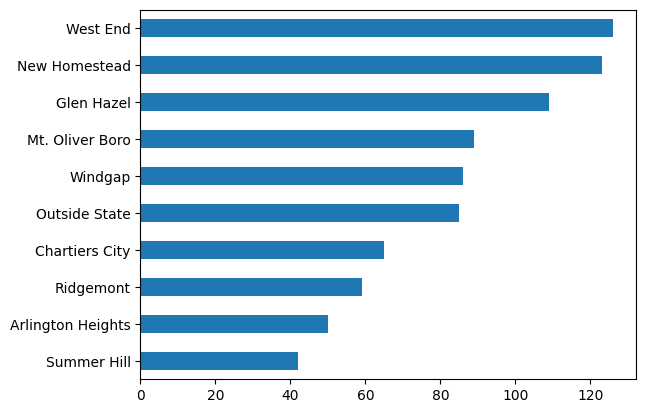

In [17]:
#Create an empty dictionary
n_values = {}

#This code sums the v_i values of each neighborhood
for index, row in police_incidents.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in n_values:
        n_values[row['INCIDENTNEIGHBORHOOD']] = 0 #Creates a new key within the dictionary with init value 0 if key is not already in dict
    for Vindex, item in v_i_sorted.items(): #I don't care about terrible efficieny, I just want this to work
        if row['INCIDENTHIERARCHYDESC'] == Vindex:
            n_values[row['INCIDENTNEIGHBORHOOD']] =  n_values[row['INCIDENTNEIGHBORHOOD']] + (item) #adds the int within the sorted v_i values into the value of the dict

#This code adds the z value for each neighborhood
for key in n_values:
    for index, item in z_vals.items(): #z_vals have unique keys, so the order of for loops doesn't matter
        if index == key:
            n_values[key] = n_values[key] + item

#Put into a final Series
police_incidents_final = pd.Series(n_values).sort_values()
#police_incidents_final.head().plot.bar()
police_incidents_final.head(10).plot.barh()

As we can see, **Summer Hill** has the least $N$ value out of all neighborhoods.

### Submetric 2: Firearm Seizures

In [ ]:
#Code, work, and more Markdown Above Submetric 3

### Submetric 3: Police Arrests

In [ ]:
#Code, work, and more Markdown

## Conclusion

### Yanjia: Police Reported Incidents


### Parth:


### Adeel:


It has thus been decided that **XXXXXX** is the best neighborhood in Pittsburgh.